In [1]:
import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

(sec:theory_measurementError)=
# Example: Measuring Air Quality

Across the US, sensors to measure air pollution are widely used by individuals, community groups, and state and local air monitoring agencies {cite}`hug2020,owyang2020`. For example, on two days in September, 2020, approximately 600,000 Californians and 500,000 Oregonians viewed PurpleAir’s map as fire spread through their states and evacuations were planned. (PurpleAir creates air quality maps from crowd-sourced data that streams in from their sensors.)  

The sensors measure the amount of particulate matter in the air that have a diameter smaller than 2.5 micrometers (the unit of measurement is micrograms per cubic meter: μg/m3). These measurements are 2-minute averages. The level of particulate matter changes over the course of a day as, for example, people commute to and from work. But at certain times of the day, such as midnight, we expect the 2-minute averages to change little in a half-hour so we can get a sense of the variability in the instrument and in the mixing of particles in the air, if we examine the measurements taken during these times of the day. 

We can access sensor measurements from PurpleAir's site, where they provide a data download tool; the data are available for any sensor that appears on the PurpleAir map. We downloaded data from one sensor over a 24-hour period and selected three half-hour time intervals spread  throughout the day where the readings were roughly flat over each 30-minute period. This gives us three sets of 15 two-minute averages for a total of 45 measurements. 

In [2]:
pm = pd.read_csv('~/pm30.csv')
pm

,aq2.5,time,hour,meds,diff30
0,6.14,2022-04-01 00:01:10 UTC,0,5.38,0.59
1,5.00,2022-04-01 00:03:10 UTC,0,5.38,-0.55
2,5.29,2022-04-01 00:05:10 UTC,0,5.38,-0.26
...,...,...,...,...,...
42,7.55,2022-04-01 19:27:20 UTC,19,8.55,-1.29
43,9.47,2022-04-01 19:29:20 UTC,19,8.55,0.63
44,8.55,2022-04-01 19:31:20 UTC,19,8.55,-0.29


A line plot can gives us a sense of variation in the measurements. We expect the measurements to be roughly the same so we can get a sense of the variability in the air and in the instrument. 

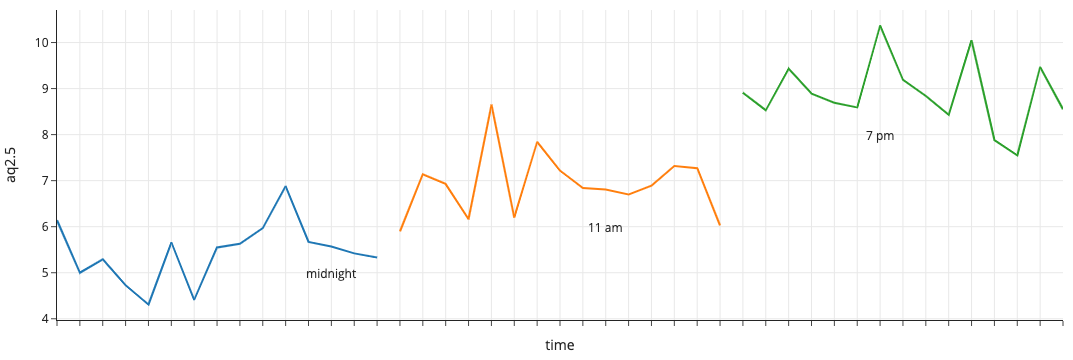

In [27]:
fig = px.line(pm, x="time", y="aq2.5", color="hour")

fig.add_annotation(x=12, y=5,
            text="midnight", showarrow=False)
fig.add_annotation(x=24, y=6,
            text="11 am", showarrow=False)
fig.add_annotation(x=36, y=8,
            text="7 pm", showarrow=False)

fig.update_xaxes(showticklabels = False)

fig.update_layout(width=500, height=350, showlegend=False)


fig.update_xaxes(showticklabels = False)

fig.show()

The plot shows us how the air quality worsens throughout the day, but in these particular half-hour intervals, the air quality is roughly 5.4, 6.6, and 8.6 at midnight, eleven in the morning, and seven in the evening, respectively.  We can think of the data scope as follows: at this particular location in a half-hour time interval, there is a true average particle concentration in the air surrounding the sensor. This concentration is our target, and our instrument, the sensor, takes many measurements that form a sample from the access frame (the dart board). If the instrument is working properly, the measurements are centered around the bullseye, and the true 30-minute average coincides with the bullseye.  

To get a better sense of the variation in a half hour interval, we can examine the differences of the measurements from the median for the corresponding half-hour. The distribution of these "errors" appears below.

Text(0.5, 0, 'Deviation from Hourly Median')

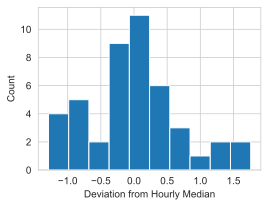

In [5]:
plt.hist(pm['diff30'], bins=10)
plt.ylabel('Count')
plt.xlabel('Deviation from 30-Minute Median')

The histogram shows us the typical fluctuations in measurements are about 1 μg/m3. Given the hourly measurements range from 4 to 13 μg/m3, the instrument is reasonably accurate.

We can use the urn model to simulate the variability in measurement process. We place in the urn the deviations of the measurements from their 30-minute averages, and we can create simulated 30-minute measurements by drawing deviations from the urn and adding a constant that represents the true 30-minute average to them. 

In [7]:
urn = pm["diff30"]

In [8]:
np.random.seed(221212)
sample = np.random.choice(urn, size=15, replace=True)
aq_imitate = 11 + sample

We can add this artificial set of measurements to the line plot and compare it to the other three real line plots.

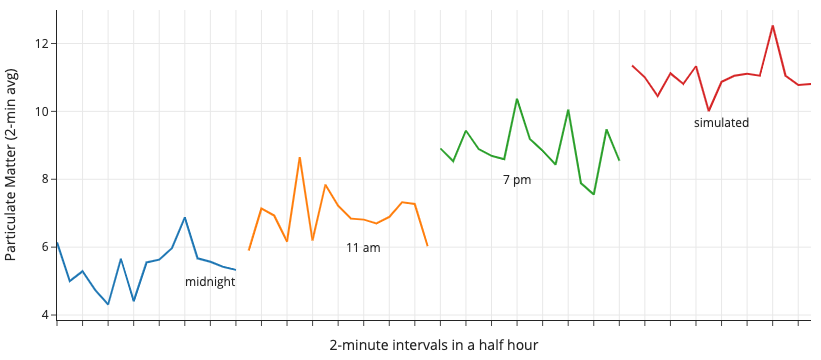

In [29]:
times = np.arange(1, 16)

fig = px.line(pm, x="time", y="aq2.5", color="hour",
             labels={
                     "time": "2-minute intervals in a half hour",
                     "aq2.5": "Particulate Matter (2-min avg)"
                 },)

fig.add_trace(go.Scatter(x=times, y=aq_imitate,
                    mode='lines'))

fig.add_annotation(x=12, y=5,
            text="midnight", showarrow=False)

fig.add_annotation(x=24, y=6,
            text="11 am", showarrow=False)

fig.add_annotation(x=36, y=8,
            text="7 pm", showarrow=False)

fig.add_annotation(x=52, y=9.7,
            text="simulated", showarrow=False)

fig.update_xaxes(showticklabels = False)

fig.update_layout(width=500, height=350, showlegend=False)

fig.show()

The shape of the artificial line plot is similar to the others, which indicates that our model for the measurement process is reasonable.  Unfortunately, what we don't know is whether the measurements are close to the true air quality. To detect bias in the instrument, we need to make comparisons against a more accurate instrument or take measurements in a protected environment where the air has a known quantity of particulate matter. In fact, researchers have found that low humidity can distort the readings so that they are too high {cite}`hug2020`. In {numref}`Chapter %s <ch:pa>`, carry out a more comprehensive analysis of the PurpleAir sensor measurement error, including bias, and we calibrate these instruments to improve their accuracy.